In [6]:
#import MNIST dataset
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')
mnist

error: [Errno 104] Connection reset by peer

In [1]:
#ALternatively
from six.moves import urllib
from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [40]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [41]:
x,y = mnist['data'],mnist['target']
x.shape,y.shape 

((70000, 784), (70000,))

<function matplotlib.pyplot.show>

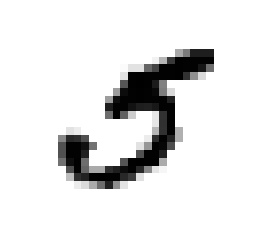

In [42]:
% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit=x[36000]
some_digit_image =some_digit.reshape(28,28)

plt.imshow (some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show

In [43]:
y[36000]

5.0

In [44]:
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [45]:
some_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  86, 131, 225, 225, 225,   0,   0,
          0,   0],
       [  

In [46]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:] #split into train and test set first of all

In [47]:
import numpy as np

shuffle_index = np.random.permutation(60000)
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index] # shuffle to get a good mix of numbers when cros validating

In [48]:
shuffle_index

array([19841, 15867, 26110, ..., 14602, 17000,  4491])

In [49]:
#Training a binary classifier- lets simplify the problem and try and identify one digit 

In [50]:
y_train_5 =(y_train==5) # refactor array to be true for only 5s
y_test_5=(y_test==5)
y_train_5

array([False, False, False, ..., False, False, False])

In [51]:
# we start with sgd as it is good with large data sets
from  sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [52]:
sgd_clf.predict([some_digit])

array([ True])

In [53]:
#lets check model performance
#accuracy measurements for classiers are trickier and for regressors

In [54]:
#using cross_validation for acc measure
#implementing your own (because u might want some control of the process?)
from sklearn.model_selection import StratifiedKFold
from sklearn.base import  clone

skfolds=StratifiedKFold(n_splits=3, random_state=42)
for train_index,test_index in skfolds.split(x_train,y_train_5):
    clone_clf=clone(sgd_clf)
    x_train_folds=x_train[train_index]
    y_train_folds=y_train_5[train_index]
    x_test_fold= x_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(float(n_correct)/len(y_pred))
    

0.96635
0.9608
0.96185


In [55]:
# using sklearn cross val
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5, cv=3,scoring='accuracy')

array([0.96635, 0.9608 , 0.96185])

In [56]:
#high accuracy because of majority class bias -5s are only 1/10th of the entire digits so a no five prediction is going
#to be correct 90% of the time - hence accuracy is not a good measure for classifiers

In [57]:
#confusion matrix - is better
from sklearn.model_selection import cross_val_predict #returns predictions of K-fold cross validation thus keeping the test data unused
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_5, cv=3)
y_train_pred.shape,x_train.shape,y_train_5.shape

((60000,), (60000, 784), (60000,))

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53850,   729],
       [ 1491,  3930]])

In [59]:
#precision and recall- precision focuses only on positive predictions... recall/sensitivity considers negatives(false negatives)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred),recall_score(y_train_5,y_train_pred)


(0.8435286542176432, 0.7249584947426674)

In [60]:
#correct only 74% of the time and detects only 78.7% of positives (i.e 5s)

In [61]:
#F1 score is a combo of precision and recall--i.e their harmonic mean
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7797619047619048

In [62]:
#F1 score favors classifiers that have similar precision and recall...not always what you want sometimes precision is good
#other times you want just recall

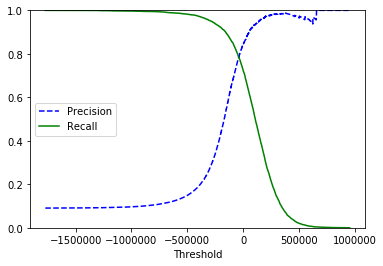

In [63]:
#Precision/ recall trade off -sgd exaample(moving threshold) page90
y_scores =cross_val_predict(sgd_clf,x_train, y_train_5, cv=3, method='decision_function') #get all the instance scores of train set

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds =precision_recall_curve(y_train_5,y_scores)

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

plt.show()

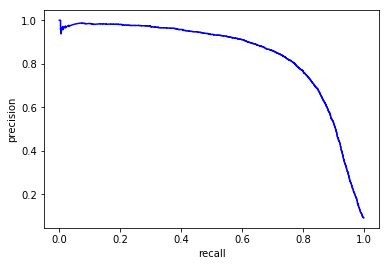

In [64]:
#you could also plot the precision values vs recall values

plt.plot(recalls,precisions,'b-')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()
# a nice threshold would be just before the bend/detioration so 70% recall

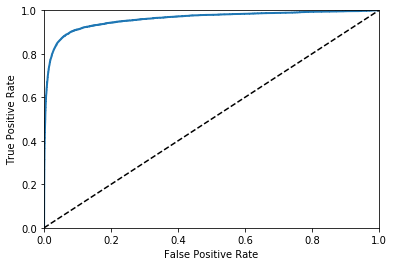

In [65]:
#ROC curve  receiver operating characteristic
#similar to precision vs recall plot but it is a plot of true positive rate(aka recall) against false positive rate
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [66]:
#ROC AUC(area under the curve)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9599703736159098

In [67]:
# use precision vs recall when you care more about false positives than false negatives and ROC otherwise

In [68]:
# ROC decision tree vs sgd classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf, x_train,y_train_5,cv=3, method='predict_proba')

In [69]:
y_probas_forest

array([[1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [70]:
y_probas_forest.shape

(60000, 2)

In [71]:
#now use the positive class porbability as score
y_scores_forest=y_probas_forest[:,1]# score=prob of positive class
fpr_forest, tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

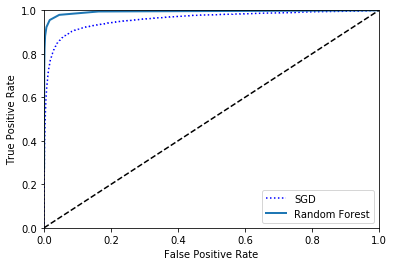

In [72]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest, tpr_forest,'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [73]:
roc_auc_score(y_train_5,y_scores_forest)

0.9937589590665898

In [74]:
y_predictions=cross_val_predict(forest_clf, x_train,y_train_5,cv=3)

In [75]:
precision_score(y_train_5,y_predictions),recall_score(y_train_5,y_predictions)

(0.9832451499118166, 0.8227264342372256)

In [76]:
#Multi class classifiers page 95-96

In [77]:
#some sci kit learn classifiers can detect multi class scenerios and then run one Vs All method except for SVM which
#runs one vs one because svm dont do well with large data sets

sgd_clf.fit(x_train,y_train) #note y_train not y_train_5
sgd_clf.predict([some_digit])

array([5.])

In [78]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-259177.63643466, -416651.98266277, -274340.7143722 ,
        -245694.49414977, -430801.33632895,   29827.23463478,
        -672339.38151993, -298245.66481189, -606534.5942091 ,
        -532382.31906042]])

In [79]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [80]:
np.argmax(some_digit_scores)

5

In [81]:
sgd_clf.classes_[3]

3.0

In [82]:
#if you want to force a particular strategy eg. one vs one
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train,y_train)
ovo_clf.predict([some_digit])

array([5.])

In [83]:
len(ovo_clf.estimators_)# number of classifiers built

45

In [84]:
# for random forest classifier no need for ovo or ova as it is by design a multiclassifiers
forest_clf.fit(x_train,y_train)# note y_train not y_train_5
forest_clf.predict([some_digit])

array([5.])

In [85]:
#getting list of probabilities
forest_clf.predict_proba([some_digit])# probability of being in each class

array([[0. , 0. , 0. , 0.1, 0. , 0.9, 0. , 0. , 0. , 0. ]])

In [86]:
forest_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [87]:
#cross validation
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')

array([0.87407518, 0.86329316, 0.886683  ])

In [88]:
# at least 79% not bad considering random classifier will get you 10% acc. however scaling input will better score
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.91291742, 0.90904545, 0.90793619])

In [89]:
x_train.astype(np.float64)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
#Error Analysis
#for purpose of improvement
#first lets look at the confusion matrix
y_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5743,    2,   20,   12,   10,   42,   48,    7,   37,    2],
       [   1, 6488,   46,   27,    6,   39,    7,   11,  104,   13],
       [  52,   34, 5332,  100,   84,   24,   93,   56,  164,   19],
       [  50,   39,  140, 5362,    3,  212,   36,   48,  139,  102],
       [  19,   28,   42,    9, 5337,    8,   63,   25,   72,  239],
       [  70,   35,   39,  190,   79, 4594,  118,   28,  181,   87],
       [  31,   24,   45,    2,   41,   78, 5646,    4,   47,    0],
       [  25,   23,   70,   38,   51,   10,    6, 5758,   16,  268],
       [  58,  161,   76,  152,   11,  151,   58,   23, 5004,  157],
       [  42,   33,   23,   92,  143,   32,    2,  172,   76, 5334]])

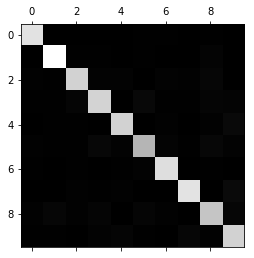

In [91]:
# alot of numberss---how about visualising the matrix?
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

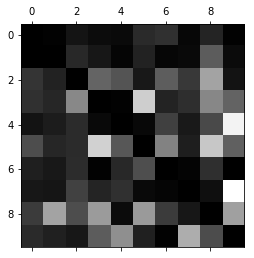

In [92]:
#not bad all brightest boxes are on the diagonal
#now divide each value in the matrix by num of images in the corresponding class
#to compare error rate instaed of absolute numbers(which would make abundant classes look bad)
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx= conf_mx.astype(np.float64)/row_sums
#now fill diagonal with zeros to keep only errors
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [93]:
norm_conf_mx

array([[0.        , 0.00033767, 0.00337667, 0.002026  , 0.00168833,
        0.007091  , 0.008104  , 0.00118183, 0.00624683, 0.00033767],
       [0.00014832, 0.        , 0.0068229 , 0.00400475, 0.00088994,
        0.00578463, 0.00103827, 0.00163156, 0.01542569, 0.00192821],
       [0.00872776, 0.00570661, 0.        , 0.01678416, 0.01409869,
        0.0040282 , 0.01560926, 0.00939913, 0.02752602, 0.00318899],
       [0.00815528, 0.00636112, 0.02283477, 0.        , 0.00048932,
        0.03457837, 0.0058718 , 0.00782907, 0.02267167, 0.01663676],
       [0.00325231, 0.00479288, 0.00718932, 0.00154057, 0.        ,
        0.00136939, 0.01078398, 0.00427936, 0.01232455, 0.04091065],
       [0.01291275, 0.00645637, 0.00719424, 0.03504888, 0.01457296,
        0.        , 0.0217672 , 0.0051651 , 0.03338867, 0.0160487 ],
       [0.00523826, 0.00405542, 0.00760392, 0.00033795, 0.00692802,
        0.01318013, 0.        , 0.0006759 , 0.00794187, 0.        ],
       [0.00399042, 0.00367119, 0.0111731

In [94]:
#remember rows are actual classes and columns are predictions
#row columns 8 and 9 are quite bright which tells you many images get misclassified as 8s or 9s
#similarly rows 8 and 9 are bright telling you that 8 and 9 are often confused with other digits
# row one is dark --mostly correctly classified a few confused with 8s
#more fives classed as eight than reverse----errors are not symmetrical
#check page 100-101 for interesting plot

In [95]:
#MultiLabel Classification
from sklearn.neighbors import KNeighborsClassifier
y_train_large =(y_train>=7)
y_train_odd=(y_train %2==1)
y_multilabel=np.c_[y_train_large, y_train_odd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [96]:
y_multilabel.shape

(60000, 2)

In [97]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
#to evaluate a multilabel classifier get any metric including F1 score used for binary
#classifiers for each individual label and compute the average
y_train_knn_pred = cross_val_predict(knn_clf,x_train,y_multilabel,cv=3)
#f1_score(y_multilabel,y_train_knn_pred, average='macro')#takes forever

In [98]:
knn_clf2 = KNeighborsClassifier()
knn_clf2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [99]:
knn_clf2.predict([some_digit])

array([5.])

In [101]:
cross_val_score(knn_clf2,x_train,y_train,cv=3)

array([0.96895621, 0.9679984 , 0.96809521])